# Dim_Red_Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from kneed import KneeLocator

In [2]:
df = pd.read_excel(r'D:\Data Scientist\Dimension reduction\Principle component analysis(PCA)\Dataset\University_Clustering.xlsx')

In [3]:
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


In [5]:
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


In [6]:
df1 = df.drop(['UnivID'],axis =1)

In [7]:
df1

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [9]:
df1.isnull().sum()

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [10]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [11]:
numeric_features

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [ ]:
# Define the pipeline steps

In [12]:
pca = PCA(n_components = 6)

In [13]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'),StandardScaler(),pca)

In [ ]:
# Pass the raw data through pipeline

In [14]:
processed = num_pipeline.fit(df1[numeric_features])

In [15]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

In [ ]:
# Save the data preprocessing pipeline with imputation and standardization

In [16]:
import joblib
joblib.dump(processed,"Data_prep_DimRed.pkl")

['Data_prep_DimRed.pkl']

In [17]:
import os
os.getcwd()

'C:\\Users\\Administrator'

In [ ]:
# import the pipeline

In [18]:
model = joblib.load("Data_prep_DimRed.pkl")

In [19]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

In [ ]:
# Apply the save model into dataset to extract pca values

In [20]:
pca_res = pd.DataFrame(model.transform(df1[numeric_features]))

In [21]:
pca_res

,0,1,2,3,4,5
0,-1.008824,-1.069154,0.078815,0.053320,-0.124905,-0.045254
1,-2.822327,2.252320,0.844907,0.136340,-0.091849,-0.173769
2,1.112562,1.626748,-0.256960,1.080296,-0.175069,0.334079
3,-0.683955,0.031322,0.150691,-0.081396,-0.627660,0.091600
4,-0.310925,-0.640049,0.006737,0.165489,0.018108,-0.023414
5,-1.695867,-0.348666,-0.255731,0.009171,-0.055605,-0.035697
6,-1.245805,-0.496317,-0.043130,-0.218671,0.290790,-0.074597
7,-0.389018,-0.782644,-0.464465,0.064073,-0.549292,-0.083806
8,-2.373384,-0.392515,0.112782,-0.452592,-0.243764,0.259592
9,-1.402687,2.116496,-0.446030,-0.641238,0.218553,-0.224627


In [ ]:
# PCA weights

In [22]:
model['pca'].components_

array([[-0.45813885, -0.42716104,  0.42420075,  0.3908408 , -0.36243393,
        -0.37892093],
       [ 0.03576417, -0.20143553,  0.31869533, -0.4346534 ,  0.63461057,
        -0.51470747],
       [ 0.18078706,  0.49125198, -0.17425864,  0.59925723,  0.20292589,
        -0.54344578],
       [ 0.1359349 ,  0.35737683,  0.04516736, -0.51115551, -0.62714633,
        -0.44403936],
       [ 0.00545604,  0.51133027,  0.7935202 ,  0.07218408,  0.06811593,
         0.31462193],
       [ 0.85885837, -0.38269024,  0.23750061,  0.18088716, -0.16364553,
         0.00198112]])

In [ ]:
# Take a closer look at the components

In [23]:
components = pd.DataFrame(model['pca'].components_,columns = numeric_features).T

In [24]:
components.columns = ['pc0','pc1','pc2','pc3','pc4','pc5']

In [25]:
components

,pc0,pc1,pc2,pc3,pc4,pc5
SAT,-0.458139,0.035764,0.180787,0.135935,0.005456,0.858858
Top10,-0.427161,-0.201436,0.491252,0.357377,0.511330,-0.382690
Accept,0.424201,0.318695,-0.174259,0.045167,0.793520,0.237501
SFRatio,0.390841,-0.434653,0.599257,-0.511156,0.072184,0.180887
Expenses,-0.362434,0.634611,0.202926,-0.627146,0.068116,-0.163646
GradRate,-0.378921,-0.514707,-0.543446,-0.444039,0.314622,0.001981


In [26]:
print(model['pca'].explained_variance_ratio_)

[0.76862924 0.13140213 0.04771658 0.02696455 0.02106913 0.00421836]


In [27]:
var1 = np.cumsum(model['pca'].explained_variance_ratio_)

In [28]:
var1

array([0.76862924, 0.90003138, 0.94774795, 0.97471251, 0.99578164,
       1.        ])

In [ ]:
# Variance plot for PCA components obtained

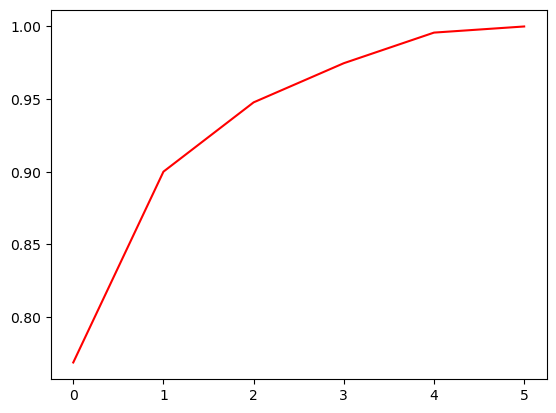

In [29]:
plt.plot(var1,color = 'red')

In [ ]:
# kneelocator

In [30]:
from kneed import KneeLocator

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1712\662084988.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


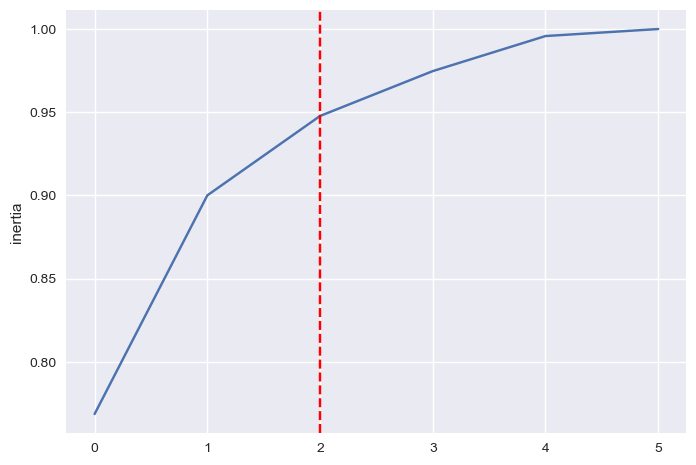

In [31]:
kl = KneeLocator(range(len(var1)),var1,curve = 'concave',direction = 'increasing')
kl.elbow
plt.style.use("seaborn")
plt.plot(range(len(var1)),var1)
plt.xticks(range(len(var1)))
plt.ylabel('inertia')
plt.axvline(x = kl.elbow,color = 'r',label = 'axvline - full height',ls = '--')
plt.show()

In [ ]:
# PCA for feature extraction

In [32]:
final = pd.concat([df.Univ,pca_res.iloc[ : ,0:3]],axis =1)

In [33]:
final.columns = ['Univ','pc0','pc1','pc2']

In [34]:
final

,Univ,pc0,pc1,pc2
0,Brown,-1.008824,-1.069154,0.078815
1,CalTech,-2.822327,2.252320,0.844907
2,CMU,1.112562,1.626748,-0.256960
3,Columbia,-0.683955,0.031322,0.150691
4,Cornell,-0.310925,-0.640049,0.006737
5,Dartmouth,-1.695867,-0.348666,-0.255731
6,Duke,-1.245805,-0.496317,-0.043130
7,Georgetown,-0.389018,-0.782644,-0.464465
8,Harvard,-2.373384,-0.392515,0.112782
9,JohnsHopkins,-1.402687,2.116496,-0.446030
